<strong>Aluno</strong>: Victor São Paulo Ruela



In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

## Benchmark ELMs

Inicialmente, carrega-se os dados para as funções indicadas no enunciado. Eles foram gerados utilizando o pacote R indicado e exportados para arquivos CSV.

In [2]:
normals = pd.read_csv('2dnormals.csv')
xor = pd.read_csv('xor.csv')
circle = pd.read_csv('circle.csv')
spirals = pd.read_csv('spirals.csv')

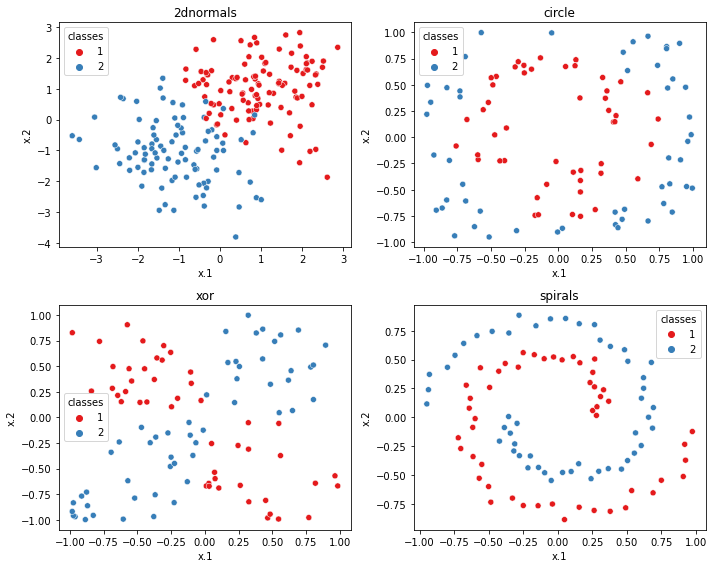

In [26]:
# plot the functions
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.scatterplot(data=normals, x="x.1", y="x.2", hue='classes', ax=ax[0,0], palette='Set1')
sns.scatterplot(data=xor, x="x.1", y="x.2", hue='classes', ax=ax[1,0],palette='Set1')
sns.scatterplot(data=circle, x="x.1", y="x.2", hue='classes', ax=ax[0,1],palette='Set1')
sns.scatterplot(data=spirals, x="x.1", y="x.2", hue='classes', ax=ax[1,1],palette='Set1')

ax[0,0].set_title('2dnormals')
ax[1,0].set_title('xor')
ax[0,1].set_title('circle')
ax[1,1].set_title('spirals')

plt.tight_layout()
fig.show()

A seguir, é feita a implementação do algoritmo ELM.

In [43]:
# Implementação do perceptron simples para um problema de classificação binário
class ELM:
    def __init__(self, p=5):
        self.p = p

    def predict(self, x, w, H, Z):
        N, _ = x.shape
        x_aug = np.hstack((-np.ones((N, 1)), x))
        H = np.tanh(x_aug @ Z)
        u = np.sign(H @ w)
        return u

    def fit(self, x_train, y_train):
        N, n = x_train.shape
        # augment X
        x_aug = np.hstack((-np.ones((N, 1)), x_train))
        # create initial Z matrix
        Z = np.random.uniform(-0.5, 0.5, (n+1, self.p))
        # apply activation function: tanh
        H = np.tanh(x_aug @ Z)
        # calculate the weights
        w = np.linalg.pinv(H) @ y_train
        #w = (np.linalg.solve(np.transpose(H) @ H) @ np.transpose(H)) @ y_train
        return w, H, Z

e = ELM()
X, y = normals[['x.1', 'x.2']].to_numpy(), normals['classes'].to_numpy()
y = np.sign(y - 2)
w, H, Z = e.fit(X, y)
yp = e.predict(X, w, H, Z)

Em seguida, é criada uma rotina que recebe um conjunto de dados de entrada e desenha a sua superfície de separação conforme a sugestão do enunciado do exercício.

In [52]:
def train_test_split(X, y, ratio=0.7):
    N = len(y)
    x_rand = np.arange(N)
    np.random.shuffle(x_rand)
    i_split = int(np.floor(ratio * N))

    x_train, x_test = x_rand[:i_split], x_rand[i_split:]
    return X[x_train,:], y[x_train], X[x_test,:], y[x_test]

def plot_decision_boundary(data, plot_error=False):
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    x = np.arange(0, 6, step=0.1)
    y = np.arange(0, 6, step=0.1)

    xx, yy = np.meshgrid(x, y)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    
    # split the data
    X, y = data[['x.1', 'x.2']].to_numpy(), data['classes'].to_numpy()
    y = np.sign(y - 2)

    #X_train, y_train, X_test, y_test = train_test_split(X, y)

    # train the model
    model = ELM()
    w, H, Z = model.fit(X, y)

    # make predictions for the grid
    yhat = model.predict(grid, w, H, Z)
    print(yhat)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    ax1.contourf(xx, yy, zz, cmap='Set2')
   
    t_class0 = data['classes'] == 1
    t_class1 = data['classes'] == 2
    ax1.scatter(data.loc[t_class0, 'x.1'],
                data.loc[t_class0, 'x.2'], color='red')
    ax1.scatter(data.loc[t_class1, 'x.1'], data.loc[t_class1, 'x.2'], color='blue')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')

    surf = ax2.plot_surface(xx, yy, zz, cmap='jet')

    fig.show()

    # print final training error
    print(f'Model Accuracy: {100 * np.sum(y == model.predict(X,w, H, Z))/len(y)} %')

[-1. -1. -1. ... -1. -1. -1.]
Model Accuracy: 54.0 %


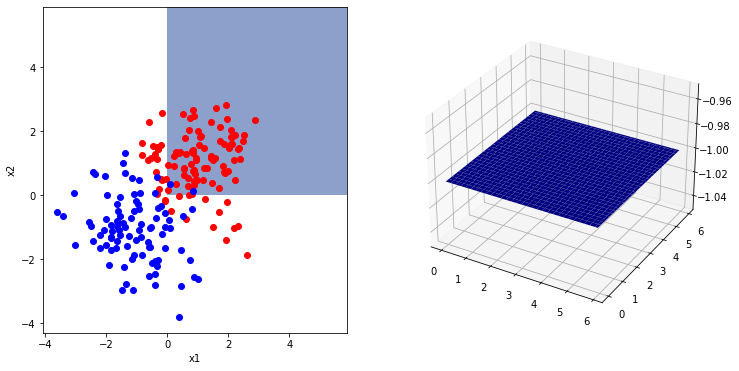

In [53]:
# Linear perceptron
plot_decision_boundary(normals)

Conforme o esperado, o Perceptron conseguiu atingir uma acurácia de 100%, uma vez que eles são linearmente separáveis. A superfície de separação foi calculada e pode ser vista na figura acima, a qual corrobora com este resultado de acurácia.

## Exercício 2

Conforme o enunciado, um dataset contendo 200 amostras de cada classe é gerado e posteriormente separado entre um conjunto de testes e treinamento, na proporção 70/30.

Acurácia: 100.0 %


Text(0.5, 1.0, 'Matriz de Confusão')

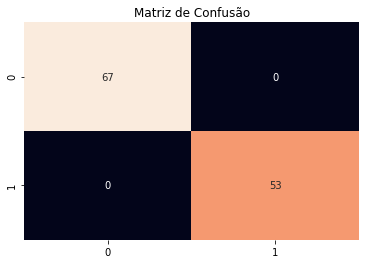

In [12]:
# split the data
def train_test_split(X, y, ratio=0.7):
    N = len(y)
    x_rand = np.arange(N)
    np.random.shuffle(x_rand)
    i_split = int(np.floor(ratio * N))

    x_train, x_test = x_rand[:i_split], x_rand[i_split:]
    return X[x_train,:], y[x_train], X[x_test,:], y[x_test]
    
data_c1 = func_normal([2,2], [0.4, 0.4], 0, N=200)
data_c2 = func_normal([4,4], [0.4, 0.4], 1, N=200)
data = pd.concat([data_c1, data_c2], ignore_index=True)

X, y = data[['x1','x2']].to_numpy(), data['y'].to_numpy()

X_train, y_train, X_test, y_test = train_test_split(X, y)
model = LinearPerceptron()
# train the model on training set
w, e, wk = model.train(X_train, y_train)
# make predictions for the teste set
_, yhat = model.predict(X_test, w)
# print the accuracy
print(f'Acurácia: {100 * np.sum(y_test == model.predict(X_test, w))/len(y_test)} %')
# print the confusion matrix
#print(f'Matriz de Confusão: \n {confusion_matrix(y_test, yhat)}')
sns.heatmap(confusion_matrix(y_test, yhat),annot=True,fmt="d",cbar=False)
plt.title('Matriz de Confusão')

Após o treinamento, é possível constatar que o modelo conseguiu atingir uma acurácia de 100% sobre o conjunto de testes. A matriz de confusão mostra que todas as amostras foram corretamente classificas, uma vez que somente há valores na sua diagonal principal. Portanto, o modelo conseguiu obter uma boa generalização para esta base de dados.

## Exercício 3

Para este exercício será utilizada a base de dados Iris. Inicialmente, ela é carregada e os dados processados de forma a transformá-lo em um problema de classificação binário, conforme o enunciado. A princípio, nenhum pré-processamento adicional será aplicado sobre as variáveis dependentes.

In [13]:
# load the iris data
X_iris, y_iris = load_iris(as_frame=True, return_X_y=True)
# create the modified target
y_target = y_iris.map(lambda x: 1 if x >=1 else 0)

Uma rotina é criada para facilitar a execução do experimento, a qual implementa os passoss descritos no enunciado.

In [15]:
def iris_experiment(X, y, N=100, print_iterations=False, print_results=True):
    # split the data
    X_train_iris, y_train_iris, X_test_iris, y_test_iris = train_test_split(X, y)

    model = LinearPerceptron(max_epochs=100)
    error_results = []
    for i in range(N):
        # train the model on training set
        w_iris, _, _ = model.train(X_train_iris, y_train_iris)
        # make predictions for the teste set
        _, yhat_iris = model.predict(X_test_iris, w_iris)
        # accuracy
        accuracy = 100 * np.sum(y_test_iris == model.predict(X_test_iris, w_iris))/len(yhat_iris)
        error_results.append(100 - accuracy)
        if(print_iterations):
            # print the accuracy
            print(f'Acurácia: {accuracy} %')
            # print the confusion matrix
            #print(f'Matriz de Confusão: \n {confusion_matrix(y_test_iris, yhat_iris)}')
            sns.heatmap(confusion_matrix(y_test_iris, yhat_iris),annot=True,fmt="d",cbar=False)
            plt.title('Matriz de Confusão')

    if(print_results == True):
        plt.plot(error_results, 'ko-')
        plt.xlabel('Iteração')
        plt.ylabel('Erro (%)')
        print(f'Variância: {np.var(error_results)}')


Inicialmente, executa-se a rotina considerando somente uma execução do treinamento, para a qual calcula-se a acurácia sobre o conjunto de teste, bem como sua matriz de confusão: 

Acurácia: 100.0 %


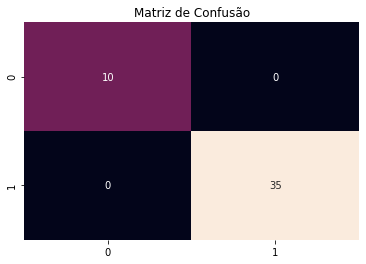

In [16]:
iris_experiment(X_iris.to_numpy(), y_target.to_numpy(), 1, True, False)

Como pode ser visto acima, o modelo obeteve uma boa generalização, apresentando acurácia máxima. Entrentanto, é importante notar que o processo de treinamento e definição das bases de treino e teste é estocástico, de forma que novas execuções poderiam resultar em acurácias diferentes.

Um novo experimento é executado considerando 100 execuções do treinamento sobre essa base de dados, como forma de se observar este cenário:

Variância: 0.918024691358029


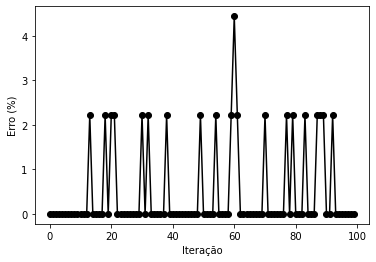

In [17]:
iris_experiment(X_iris.to_numpy(), y_target.to_numpy(), 100)

Conforme esperado, o comportamento estocástico do treinamento do Perceptron e divisão da base de dados pode gerar resultados diferente para a acurácia, a qual apresentou uma variância de 0.918. Logo, é importante levar isso em consideração estes fatores ao se modelar conjuntos de dados reais com o Perceptron.

## Exercício 4

Para este exercício, será utilizada a base de dados Breast Cancer. Este é um problema de classificação binário, o qual possui um total de 30 atributos. Inicialmente, os dados são carregados e normalizados para o intervalo de 0 a 1. Em seguida, um pré-processamento adicional é realizado para remover atributos altamente correlacionados entre si, com o objetivo de eliminar redundâncias e reduzir a dimensionalidade do problema.

In [19]:
# load the breast cancer data
X_bc, y_bc = load_breast_cancer(return_X_y = True)

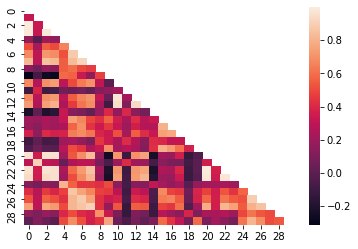

In [21]:
# preprocessing
# normalize data
scaler = MinMaxScaler()
X_bc_norm = scaler.fit_transform(X_bc)

X_bc_df = pd.DataFrame(X_bc_norm)
fig, ax = plt.subplots()
sns.heatmap(X_bc_df.corr(), ax=ax, mask=np.triu(X_bc_df.corr()))
fig.show()

Analisando o mapa de calor acima, é possível notar que os seguintes pares de variáveis altamente correlacionadas:
* ([2,3,20,22,23],0)
* ([2,3], 20)
* ([2,3], 22)
* ([2,3], 23)
* (12, 10)
* ([22,23], 20)
* (7,27)

A partir desta inspeção visual, serão removidas os seguintes atributos da base de dados: [2,3,10,20,27]


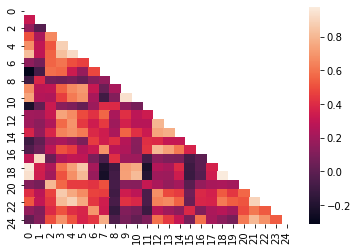

In [43]:
# remove highly correlated features
cols_to_remove = [2,3,10,20,27] 
cols_mask = np.isin(np.arange(X_bc_norm.shape[1]) , cols_to_remove, invert=True)
X_bc_norm_final = X_bc_norm[:, cols_mask]

fig, ax = plt.subplots()
corr = pd.DataFrame(X_bc_norm_final).corr()
sns.heatmap(corr, ax=ax, mask=np.triu(corr))
fig.show()

Na sequência é criada uma rotina para a execução do experimento proposto no enunciado.

In [44]:
def breast_cancer_experiment(X, y, N=30, print_iterations=False, print_results=True):
    # split the data
    X_train, y_train, X_test, y_test= train_test_split(X, y)
    
    model = LinearPerceptron(max_epochs=100)
    accuracy_results = []
    for i in range(N):
        # train the model on training set
        w, _, _ = model.train(X_train, y_train)
        # make predictions for the teste set
        _, yhat = model.predict(X_test, w)
        # accuracy
        accuracy = 100 * np.sum(y_test == model.predict(X_test, w))/len(yhat)
        accuracy_results.append(accuracy)
        if(print_iterations):
            # print the accuracy
            print(f'Acurácia: {accuracy} %')
            # print the confusion matrix
            # print(f'Matriz de Confusão: \n {confusion_matrix(y_test, yhat)}')
            sns.heatmap(confusion_matrix(y_test, yhat),annot=True,fmt="d",cbar=False)
            plt.title('Matriz de Confusão')

    if(print_results == True):
        plt.plot(accuracy_results, 'ko-')
        plt.xlabel('Iteração')
        plt.ylabel('Acurácia (%)')
        print(f'Média: {np.mean(accuracy_results)}')
        print(f'Desvio padrão: {np.std(accuracy_results)}')

Inicialmente, executa-se a rotina considerando somente uma execução do treinamento para o conjunto de dados processado, para a qual calcula-se a acurácia sobre o conjunto de teste, bem como sua matriz de confusão:

Acurácia: 98.24561403508773 %


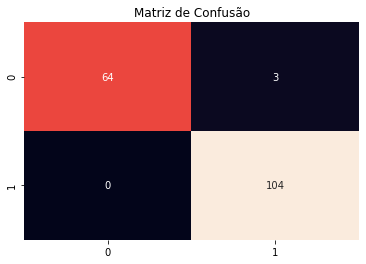

In [48]:
breast_cancer_experiment(X_bc_norm_final, y_bc, 1, True, False)

Conforme pode ser visto, obtém-se uma acurácia relativamente alta, em torno de 98%. Devido à natureza estocástica do treinamento e divisão dos dados, esse mesmo experimento será executado mais vezes para obter a distribuição dos resultados e poder avaliar melhor o desempenho do modelo.

Média: 95.73099415204679
Desvio padrão: 1.9753620764976065


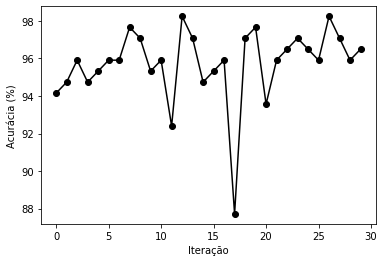

In [46]:
# reduced features
breast_cancer_experiment(X_bc_norm_final, y_bc, 30)

Conforme esperado, há uma certa variabilidade nos resultados, porém a acurácia continua alta, com média em torno de 95%. Vale notar que em uma das execuções, uma acurácia de 88% foi obtida. Isso mostra como a escolha dos dados de teste e treinamento pode resultar em modelos com generalizações bem diferentes.

A critério de curiosidade, o mesmo experimento é executado considerando o conjunto de dados completo. Como pode ser visto abaixo, a acurácia média é bem próxima e podemos concluir que a remoção dos atributos selecionados não impactou no desempenho do modelo. 

Apesar de apresentar uma acurácia média maior, não podemos afirmar que o modelo reduzido teve melhor desempenho sem o desenho de um experimento mais rigoroso e a execução de testes estatísticos.

Média: 94.85380116959065
Desvio padrão: 2.099841404989511


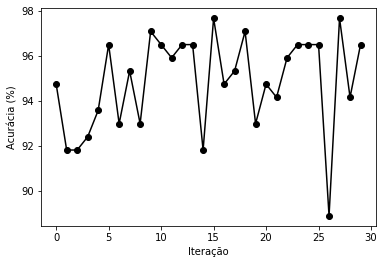

In [49]:
# all features
breast_cancer_experiment(X_bc_norm, y_bc, 30)